# Notebook #4: Estandización

In [1]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import pickle
from collections import Counter
pd.set_option('display.max_columns', None)

# Feature scaling
# -----------------------------------------------------------------------
from sklearn.preprocessing import RobustScaler, MinMaxScaler, Normalizer, StandardScaler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split

# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------
import sys
sys.path.append("../../")
from src import soporte_scaling as ss

- Como primer paso, cargaremos los datos.

In [2]:
df = pd.read_pickle('../../datos/pickles_transformados/modelo4/df_sinoutliers.pkl')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,0,0.159846547314578,0.159846547314578,6,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,131160,1.0,11,0.159846547314578,1.0,0.159846547314578,1,0,0,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578
1,31,1,0.159846547314578,0.159846547314578,10,0.159846547314578,0.079923273657289,0.079923273657289,0.079923273657289,0.159846547314578,0.159846547314578,41890,0.0,23,0.159846547314578,6.0,0.159846547314578,5,1,4,0.079923273657289,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578
2,32,0,0.579923273657289,0.579923273657289,17,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.079923273657289,193280,1.0,15,0.159846547314578,5.0,0.159846547314578,5,0,3,0.159846547314578,0.579923273657289,0.159846547314578,0.079923273657289,0.079923273657289
3,38,0,0.159846547314578,0.38661551577152603,2,0.159846547314578,0.38661551577152603,0.079923273657289,0.159846547314578,0.159846547314578,0.05328218243819267,83210,3.0,11,0.079923273657289,13.0,0.159846547314578,8,7,5,0.159846547314578,0.079923273657289,0.159846547314578,0.579923273657289,0.05328218243819267
4,32,0,0.079923273657289,0.2899616368286445,10,0.579923273657289,0.159846547314578,0.05328218243819267,0.38661551577152603,0.079923273657289,0.579923273657289,23420,4.0,12,0.159846547314578,9.0,0.079923273657289,6,0,4,0.079923273657289,0.159846547314578,0.079923273657289,0.05328218243819267,0.0399616368286445


- Separamos las columnas a las que se va a aplicar la estandarización, que son las numéricas.

In [3]:
col_numericas = df.select_dtypes(include=np.number).columns
col_numericas

Index(['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

- Y aplicamos los 4 escaladores con los que contamos:

In [4]:
df_escaladores_graf = ss.aplicar_escaladores(df, ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], [RobustScaler(), MinMaxScaler(), StandardScaler(), Normalizer()])

In [5]:
df_escaladores_graf.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Age_robust,DistanceFromHome_robust,MonthlyIncome_robust,NumCompaniesWorked_robust,PercentSalaryHike_robust,TotalWorkingYears_robust,YearsAtCompany_robust,YearsSinceLastPromotion_robust,YearsWithCurrManager_robust,Age_minmax,DistanceFromHome_minmax,MonthlyIncome_minmax,NumCompaniesWorked_minmax,PercentSalaryHike_minmax,TotalWorkingYears_minmax,YearsAtCompany_minmax,YearsSinceLastPromotion_minmax,YearsWithCurrManager_minmax,Age_standard,DistanceFromHome_standard,MonthlyIncome_standard,NumCompaniesWorked_standard,PercentSalaryHike_standard,TotalWorkingYears_standard,YearsAtCompany_standard,YearsSinceLastPromotion_standard,YearsWithCurrManager_standard,Age_normalizer,DistanceFromHome_normalizer,MonthlyIncome_normalizer,NumCompaniesWorked_normalizer,PercentSalaryHike_normalizer,TotalWorkingYears_normalizer,YearsAtCompany_normalizer,YearsSinceLastPromotion_normalizer,YearsWithCurrManager_normalizer
0,51,0,0.159846547314578,0.159846547314578,6,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,131160,1.0,11,0.159846547314578,1.0,0.159846547314578,1,0,0,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,1.291667,-0.083333,1.503226,-0.333333,-0.500000,-1.000000,-0.666667,-0.363636,-0.6,0.785714,0.178571,0.637546,0.111111,0.000000,0.026316,0.027027,0.000000,0.000000,1.578376,-0.386080,1.414988,-0.676061,-1.149741,-1.341622,-1.007712,-0.688063,-1.154146,0.000389,0.000046,1.000000,0.000008,0.000084,0.000008,0.000008,0.000000,0.000000
1,31,1,0.159846547314578,0.159846547314578,10,0.159846547314578,0.079923273657289,0.079923273657289,0.079923273657289,0.159846547314578,0.159846547314578,41890,0.0,23,0.159846547314578,6.0,0.159846547314578,5,1,4,0.079923273657289,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,-0.375000,0.250000,-0.130783,-0.666667,1.500000,-0.444444,0.000000,0.000000,0.2,0.309524,0.321429,0.167457,0.000000,0.857143,0.157895,0.135135,0.066667,0.235294,-0.637340,0.108281,-0.489530,-1.079407,2.143328,-0.674427,-0.309710,-0.361717,-0.010697,0.000740,0.000239,1.000000,0.000000,0.000549,0.000143,0.000119,0.000024,0.000095
2,32,0,0.579923273657289,0.579923273657289,17,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.079923273657289,193280,1.0,15,0.159846547314578,5.0,0.159846547314578,5,0,3,0.159846547314578,0.579923273657289,0.159846547314578,0.079923273657289,0.079923273657289,-0.291667,0.833333,2.640278,-0.333333,0.166667,-0.555556,0.000000,-0.363636,0.0,0.333333,0.571429,0.964666,0.111111,0.285714,0.131579,0.135135,0.000000,0.176471,-0.526554,0.973412,2.740278,-0.676061,-0.052052,-0.807866,-0.309710,-0.688063,-0.296559,0.000166,0.000088,1.000000,0.000005,0.000078,0.000026,0.000026,0.000000,0.000016
3,38,0,0.159846547314578,0.38661551577152603,2,0.159846547314578,0.38661551577152603,0.079923273657289,0.159846547314578,0.159846547314578,0.05328218243819267,83210,3.0,11,0.079923273657289,13.0,0.159846547314578,8,7,5,0.159846547314578,0.079923273657289,0.159846547314578,0.579923273657289,0.05328218243819267,0.208333,-0.416667,0.625543,0.333333,-0.500000,0.333333,0.500000,2.181818,0.4,0.476190,0.035714,0.385045,0.333333,0.000000,0.342105,0.216216,0.466667,0.294118,0.138161,-0.880440,0.392005,0.130632,-1.149741,0.259647,0.213791,1.596356,0.275166,0.000457,0.000024,1.000000,0.000036,0.000132,0.000156,0.000096,0.000084,0.000060
4,32,0,0.079923273657289,0.2899616368286445,10,0.579923273657289,0.159846547314578,0.05328218243819267,0.38661551577152603,0.079923273657289,0.579923273657289,23420,4.0,12,0.15984

- Los representamos visualmente:

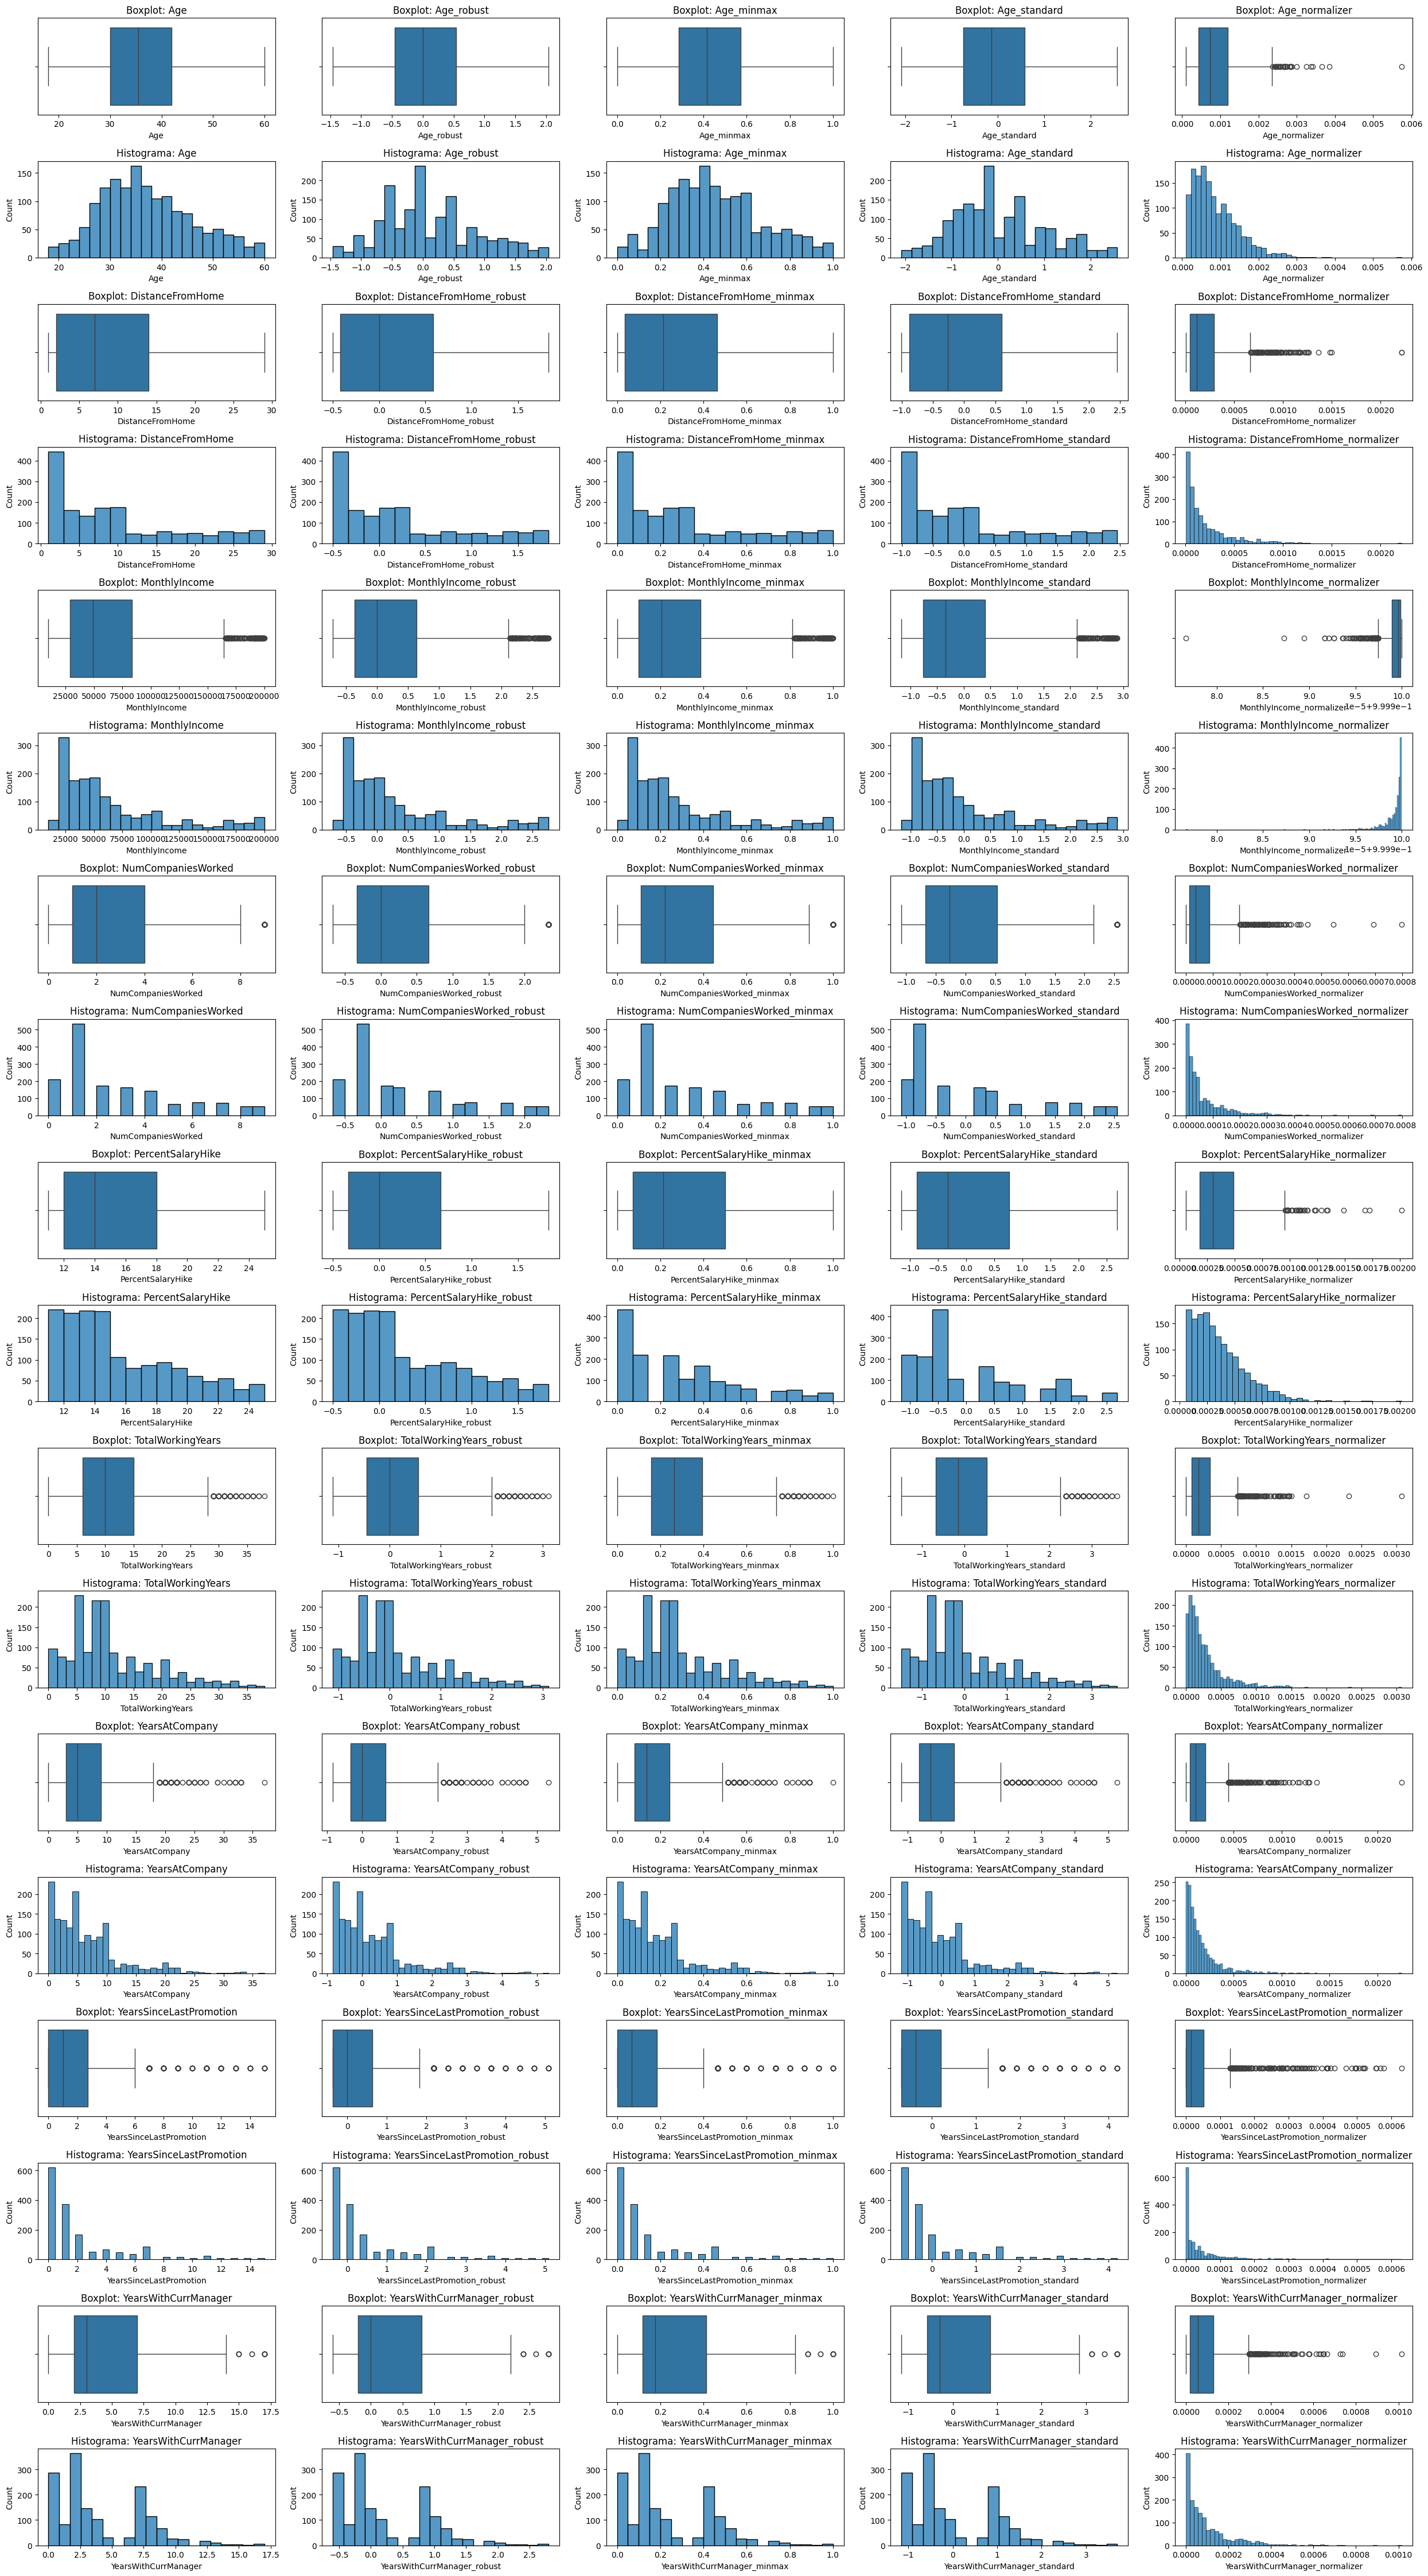

In [6]:
ss.graficar_escaladores(df_escaladores_graf, ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], ['Age_robust',
       'DistanceFromHome_robust', 'MonthlyIncome_robust',
       'NumCompaniesWorked_robust', 'PercentSalaryHike_robust',
       'TotalWorkingYears_robust', 'YearsAtCompany_robust',
       'YearsSinceLastPromotion_robust', 'YearsWithCurrManager_robust',
       'Age_minmax', 'DistanceFromHome_minmax', 'MonthlyIncome_minmax',
       'NumCompaniesWorked_minmax', 'PercentSalaryHike_minmax',
       'TotalWorkingYears_minmax', 'YearsAtCompany_minmax',
       'YearsSinceLastPromotion_minmax', 'YearsWithCurrManager_minmax',
       'Age_standard', 'DistanceFromHome_standard', 'MonthlyIncome_standard',
       'NumCompaniesWorked_standard', 'PercentSalaryHike_standard',
       'TotalWorkingYears_standard', 'YearsAtCompany_standard',
       'YearsSinceLastPromotion_standard', 'YearsWithCurrManager_standard',
       'Age_normalizer', 'DistanceFromHome_normalizer',
       'MonthlyIncome_normalizer', 'NumCompaniesWorked_normalizer',
       'PercentSalaryHike_normalizer', 'TotalWorkingYears_normalizer',
       'YearsAtCompany_normalizer', 'YearsSinceLastPromotion_normalizer',
       'YearsWithCurrManager_normalizer'])

- Nos quedaremos con el StandardScaler, dado que, en las gráficas no se observan grandes diferencias y, lo que interesa en este caso es minimizar -"suavizar"- las diferencias.

In [7]:
df_standard = ss.aplicar_escaladores(df, ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], [StandardScaler()])
df_standard.head(1)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Age_standard,DistanceFromHome_standard,MonthlyIncome_standard,NumCompaniesWorked_standard,PercentSalaryHike_standard,TotalWorkingYears_standard,YearsAtCompany_standard,YearsSinceLastPromotion_standard,YearsWithCurrManager_standard
0,51,0,0.159846547314578,0.159846547314578,6,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,131160,1.0,11,0.159846547314578,1.0,0.159846547314578,1,0,0,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,1.578376,-0.38608,1.414988,-0.676061,-1.149741,-1.341622,-1.007712,-0.688063,-1.154146


- Eliminamos las columnas originales.

In [8]:
df_standard.drop(columns = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], inplace=True)
df_standard.head(1)

,Attrition,BusinessTravel,Department,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,StockOptionLevel,TrainingTimesLastYear,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Age_standard,DistanceFromHome_standard,MonthlyIncome_standard,NumCompaniesWorked_standard,PercentSalaryHike_standard,TotalWorkingYears_standard,YearsAtCompany_standard,YearsSinceLastPromotion_standard,YearsWithCurrManager_standard
0,0,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,1.578376,-0.38608,1.414988,-0.676061,-1.149741,-1.341622,-1.007712,-0.688063,-1.154146


# Balanceo

- Como hemos visto durante el EDA, existe un desbalance significativo en la variable respuesta "Attrition", que es, en este caso, binaria. Al lanzar nuestro segundo modelo, hemos detectado que esto causa que el modelo sea incapaz de predecir correctamente cuándo se marchará un empleado de la empresa.

- Para gestionar el desbalanceo, tenemos a nuestra disposición las herramientas de la librería "imblearn", que nos ayudan a equilibrar la categoría mayoría y minoritaria a través de la creación de "hijos" basados en las características de sus vecinos con *SMOTE_NC*, y reduciendo la cantidad de datos con *TomekLink*, que identifica pares de muestras de diferentes clases que son mutuamente las más cercanas, y elimina normalmente la muestra mayoritaria.

- Como primer paso, separamos la "X" y la "y" del conjunto de datos.

In [9]:
df = df_standard
X = df.drop(columns = "Attrition")
y = df["Attrition"]

- Aplicaremos primero el método TomekLinks, que nos permitirá reducir el tamaño de la categoría mayoritaria, en este caso, "Attrition" con valor 0 (no).

- Comprobaremos los cambios en el shape y los value counts de las categorías.

In [10]:
tomek = TomekLinks(sampling_strategy='auto', n_jobs=-1)
X_sampled, y_sampled = tomek.fit_resample(X, y)

resampled_df = pd.DataFrame(X_sampled, columns=X.columns)
resampled_df["Attrition"] = y_sampled

print(f'''Shape del DataFrame original: {df.shape}
Shape del DataFrame resampled: {resampled_df.shape}
Categoría "Attrition" original: {Counter(df["Attrition"])}
Categoría "Attrition" resampled: {Counter(resampled_df["Attrition"])}''')

Shape del DataFrame original: (1550, 25)
Shape del DataFrame resampled: (1466, 25)
Categoría "Attrition" original: Counter({'0': 1303, '1': 247})
Categoría "Attrition" resampled: Counter({'0': 1219, '1': 247})


In [11]:
df.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'Education',
       'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus',
       'StockOptionLevel', 'TrainingTimesLastYear', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement',
       'PerformanceRating', 'Age_standard', 'DistanceFromHome_standard',
       'MonthlyIncome_standard', 'NumCompaniesWorked_standard',
       'PercentSalaryHike_standard', 'TotalWorkingYears_standard',
       'YearsAtCompany_standard', 'YearsSinceLastPromotion_standard',
       'YearsWithCurrManager_standard'],
      dtype='object')

- Habiendo reducido la dimensión del desbalanceo eliminando las muestras cercanas en la categoría mayoritaria -los no-, necesitamos ahora aumentar la categoría minoritaria, los sí.

- Para ello, necesitaremos indicar a al método SMOTENC aquellas features (variables) categóricas en que no queremos que aumente el número de categorías, dado que, serían ficticias. Por ejemplo, para la columna "Gender", sólo puede existir Male y Female, pero, al estar codificada numéricamente, podría crear nuevas categorías que no podrían mapearse de vuelta a otro valor.

- Parte de los parámetros que pasar a SMOTENC es cuánto queremos que gestione el desbalanceo, a través del "sampling_strategy", cuando más cercano a uno, igualará las categorías, y creará más datos ficticios, aumentando el tamaño total del dataset.

In [12]:
lista_cat = ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'BusinessTravel', 'Department', 'Education',
'EducationField', 'JobLevel', 'MaritalStatus', 'StockOptionLevel', 'TrainingTimesLastYear', 'JobInvolvement',
'PerformanceRating', 'NumCompaniesWorked_standard', 'PercentSalaryHike_standard', 'TotalWorkingYears_standard',
       'YearsAtCompany_standard', 'YearsSinceLastPromotion_standard',
       'YearsWithCurrManager_standard', 'Gender']

smotenc = SMOTENC(categorical_features=lista_cat, random_state=42, k_neighbors=5, sampling_strategy=0.7) 
X_resampled, y_resampled = smotenc.fit_resample(df, y)

resampled_data = pd.DataFrame(X_resampled, columns=df.columns)
resampled_data['Attrition'] = y_resampled

resampled_data.head(1)

,Attrition,BusinessTravel,Department,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,StockOptionLevel,TrainingTimesLastYear,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Age_standard,DistanceFromHome_standard,MonthlyIncome_standard,NumCompaniesWorked_standard,PercentSalaryHike_standard,TotalWorkingYears_standard,YearsAtCompany_standard,YearsSinceLastPromotion_standard,YearsWithCurrManager_standard
0,0,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.159847,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,1.578376,-0.38608,1.414988,-0.676061,-1.149741,-1.341622,-1.007712,-0.688063,-1.154146


- En esta primera iteración, utilizamos una estrategia de 0.7, que ha cambiado el desbalanceo de un original 84-16 a 59-41% en la variable respuesta.

In [13]:
ratio_vr = resampled_data["Attrition"].value_counts(normalize=True) * 100
print(f'''Ratio de Variable Respuesta:
      {ratio_vr}''')

Ratio de Variable Respuesta:
      Attrition
0    58.826185
1    41.173815
Name: proportion, dtype: float64


- Al realizar una comprobación de las features numéricas que hemos incluído en la lista de SMOTENC, vemos que, por ejemplo, en el caso de "Gender", tenemos 12 categorías, cuando en nuestros datos de origen teníamos sólo 2, "Male" y "Female", pero debemos puntualizar que no es un error, sino el comportamiento propio del Catboost Encoder.

- Dado que tenemos el objeto del encoder, cuando deseemos realizar el proceso inverso, seremos capaces de recuperar las categorías originales.

In [21]:
resampled_data["Gender"].value_counts().nunique()

12

In [17]:
resampled_data.shape

(2215, 25)

- Finalmente, guardamos el DF estandarizado al que aplicaremos los modelos predictivos.

In [14]:
with open('../../datos/pickles_transformados/modelo4/df_estandarizado.pkl', 'wb') as f:
    pickle.dump(resampled_data, f)